<a href="https://colab.research.google.com/github/Bu64p/TensorFlow/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network with TensorFlwo

 In this notebook we're going to learn how to write neural networks for classification problems.

> Classification is where you try to classify something as one or another.

A few types of classification problems:

* Binary classification
* Multiclass classification
* MultiLabel classification

Third Notebook



*By Engineer *Parsa Ghafoori Sadatieh**

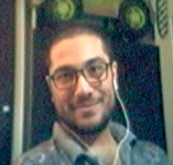

Ferdowsi universisty, Mashhad, Iran

*11/11/2024*

*8/20/1403*


[Cs231n](https://cs231n.github.io/neural-networks-case-study/)




## Import the Libraries

In [1]:
import tensorflow as tf
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
import sklearn.metrics as sm
import itertools
import random

## Creating data to view & fit

In [2]:
 # make 1000 examples
n_sample = 1000

# create circles
x , y = make_circles(n_samples=n_sample,
                    noise=0.03,
                    random_state=64 )
 # check out features
 x

array([[ 1.39885180e-01,  9.63417711e-01],
       [ 1.00248925e+00, -1.53515193e-02],
       [ 7.92900742e-01,  1.65394847e-01],
       ...,
       [ 3.95644298e-02,  9.63481596e-01],
       [ 8.04167356e-01,  3.53189325e-04],
       [ 8.29068618e-01, -5.55774891e-01]])

In [3]:
 # check out labels
 y[:10]

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1])

In [4]:
circles = pd.DataFrame({"x0":x[:,0],"x1":x[:,1],"label":y})
circles

,x0,x1,label
0,0.139885,0.963418,0
1,1.002489,-0.015352,0
2,0.792901,0.165395,1
3,-0.797960,-0.232868,1
4,0.138058,0.995301,0
...,...,...,...
995,0.777274,0.626587,0
996,-0.490370,0.918597,0
997,0.039564,0.963482,0
998,0.804167,0.000353,1


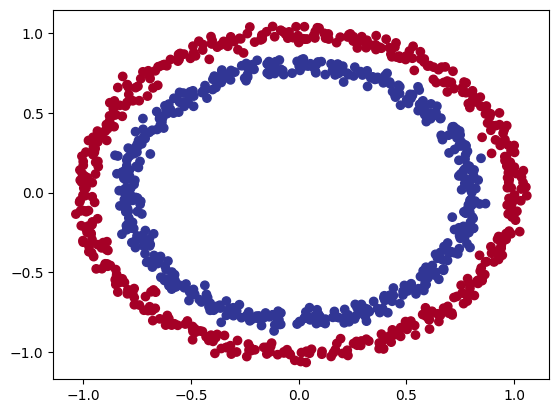

In [5]:
# visualize with a plot
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)

## Input & output shapes

In [6]:
# check the shapes of the features & labels
x.shape, y.shape

((1000, 2), (1000,))

In [7]:
# how many samples we're working
len(x),len(y)

(1000, 1000)

## Steps in modeling

The steps in modeling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fir the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [8]:
# set random seed
tf.random.set_seed(64)

# 1. create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. fit the model
history_1 = model_1.fit(x,y,epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.4587 - loss: 5.5372
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4599 - loss: 5.3282
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4601 - loss: 5.2011
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4579 - loss: 5.1638
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4592 - loss: 5.1134


In [9]:
model_1.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.4753 - loss: 4.7695


[4.722493648529053, 0.4740000069141388]

Text(0.5, 0, 'epochs')

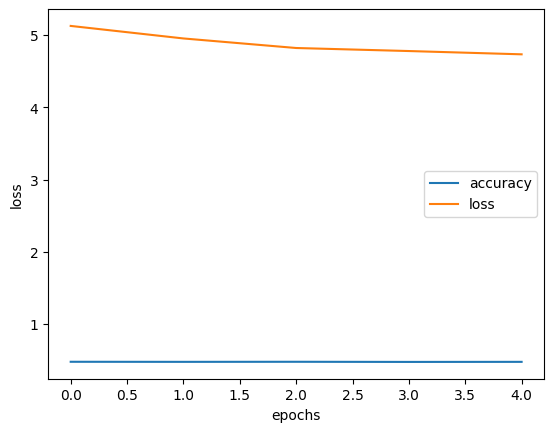

In [10]:
pd.DataFrame(history_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [11]:
# let's try and improve our model by training for longer...
history_1 = model_1.fit(x,y,epochs=200,verbose=0)

In [12]:
model_1.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4755 - loss: 4.6552 


[4.6025800704956055, 0.4699999988079071]

Text(0.5, 0, 'epochs')

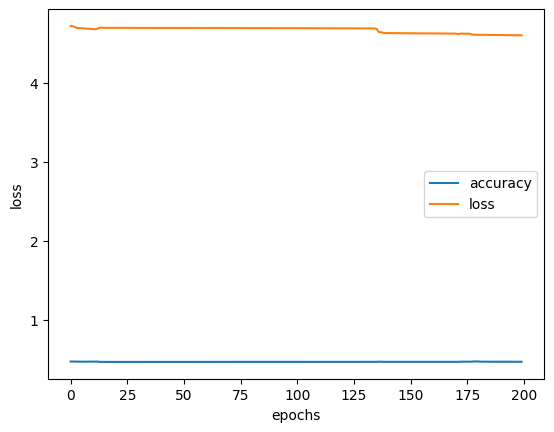

In [13]:
pd.DataFrame(history_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [14]:
tf.random.set_seed(64)

# 1:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2:
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3:
history_2 = model_2.fit(x,y,epochs=200,verbose=0)

In [15]:
model_2.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.4822 - loss: 0.7237


[0.7260248064994812, 0.492000013589859]

Text(0.5, 0, 'epochs')

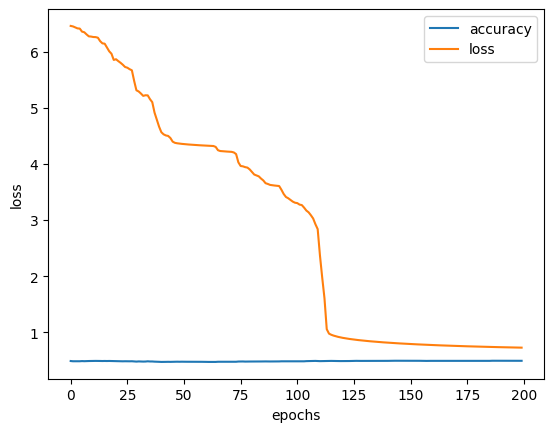

In [16]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. **Create a model**: we might to add more layers or increase the number of hidden units within a layer.
2. **Compiling a model**: here we might to choose a different optimization function such as Adam instead of SGD.
3. **Fitting a model**: perhaps we might fit our model for more epochs (leave it training for longer).



In [17]:
tf.random.set_seed(64)

# 1:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2:
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3:
history_3 = model_3.fit(x,y,epochs=200,verbose=0)

In [18]:
model_3.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4099 - loss: 0.6939


[0.6934041976928711, 0.421999990940094]

Text(0.5, 0, 'epochs')

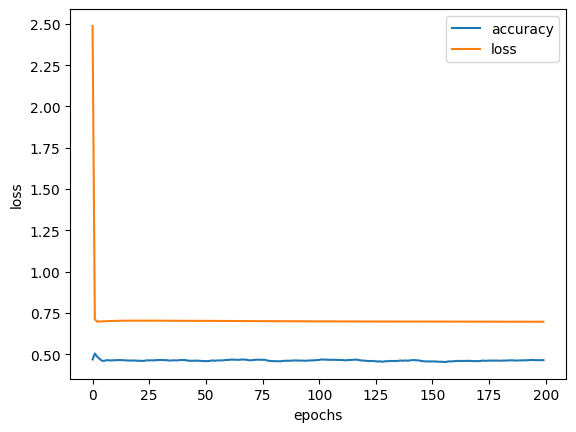

In [19]:
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [20]:
model_3.predict(np.array([(0.1,0.2)]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


array([[0.4933213]], dtype=float32)

In [21]:
model_2.predict(np.array([(0.1,0.2)]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


array([[0.42643714]], dtype=float32)

To visulize our model's predictions, let's create a function plot_decision_boundary(), this function will:

1. Take in a trained model, features (X) and labels (y)
2. Create a meshgrid of the different X values
3. Make predictions across the meshgrid
4. Plot the predictions as well as a line between zones (where each unique class falls)


In [22]:
def plot_decision_boundary(model,x,y,col=plt.cm.RdYlBu):
    """
    Plots the decision boundary created by a model predicting on X.
    """

    # Define the axis boundaries of the plot and create a meshgrid
    x_min , x_max = x[:,0].min()-0.1,x[:,0].max()+0.1
    y_min , y_max = x[:,1].min()-0.1,x[:,1].max()+0.1

    xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),
                        np.linspace(y_min,y_max,100))

    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(),yy.ravel()] # stack 2d arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # We have to reshape our predictions
        y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx,yy,y_pred,cmap=col,alpha=0.7)
    plt.scatter(x[:,0],x[:,1],c=y,s=40,cmap=col)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification


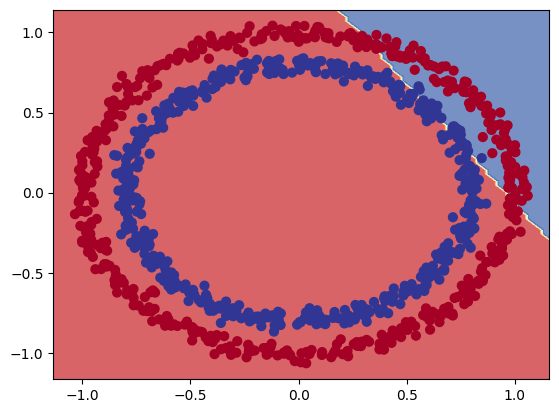

In [23]:
plot_decision_boundary(model_3,x,y)

## The missing piece: Non-linearity

In [24]:
# 1. Create a model
model_4 = tf.keras.Sequential([
    #tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid),
])
# 2. Compile a model
model_4.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["accuracy"]
)
# 3. Fit a model
history_4 = model_4.fit(x,y,epochs=250,verbose=0)

In [25]:
model_4.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0186


[0.020512202754616737, 1.0]

Text(0.5, 0, 'epochs')

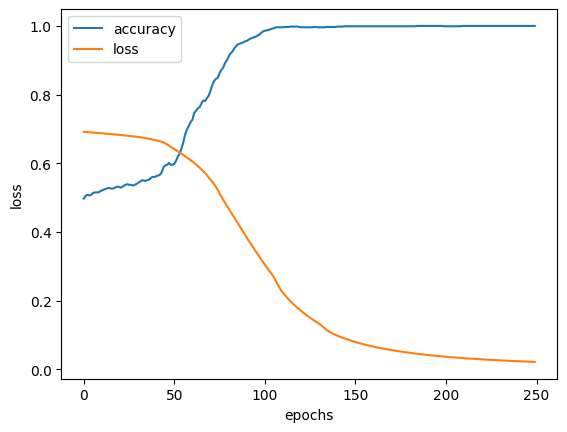

In [26]:
pd.DataFrame(history_4.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Non-liner activations
[activation functions](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html)

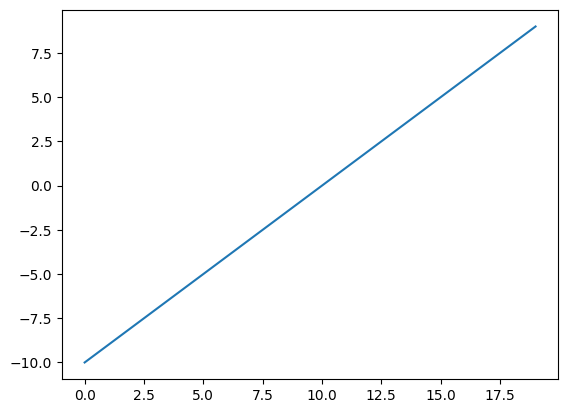

In [27]:
A = tf.constant(tf.range(-10,10,1.0),tf.float32)
plt.plot(A)

### Sigmoid
y = 1/(1 + exp(-x))

In [28]:
def sigmoid(x):
    return 1/(1+tf.exp(-x))

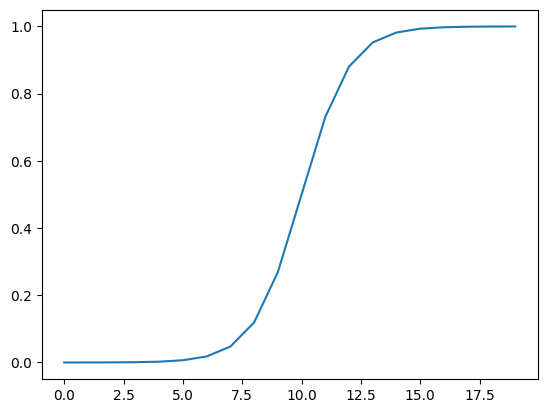

In [29]:
plt.plot(sigmoid(A))

### ReLU


In [30]:
def relu(x):
    return tf.maximum(0,x)

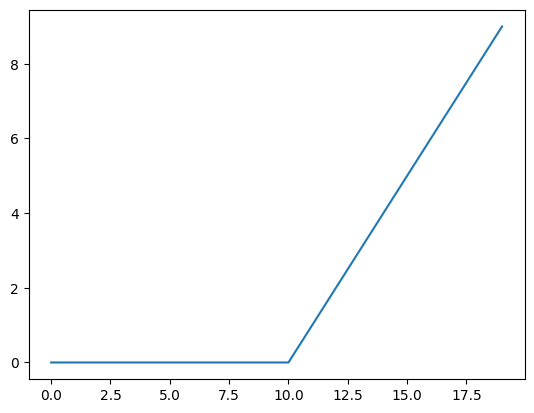

In [31]:
plt.plot(relu(A))

## Evaluating & improving the calssificiation model
So far we've been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set.

In [32]:
train_size = int(len(x)*80/100)

In [33]:
x_train = x[:train_size]
y_train = y[:train_size]

x_test = x[train_size:]
y_test = y[train_size:]

x_train.shape,y_train.shape,x_test.shape,y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [34]:
# 1.
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
# 2.
model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
# 3.
history_5 = model_5.fit(x_train,y_train,epochs=30,callbacks=[early_stopping])

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4695 - loss: 0.7388
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4613 - loss: 0.6992 
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5139 - loss: 0.6902 
Epoch 4/30
 1/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5000 - loss: 0.6865

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5522 - loss: 0.6872 
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5541 - loss: 0.6821 
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5679 - loss: 0.6752 
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5840 - loss: 0.6664 
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6093 - loss: 0.6559
Epoch 9/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6404 - loss: 0.6416
Epoch 10/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7447 - loss: 0.6195 
Epoch 11/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7640 - loss: 0.5868 
Epoch 12/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7518 - loss: 0.5513 
Epoch 13/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7578 - loss: 0.5087 
Epoch 14/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7795 - loss: 0.4828 
Epoch 15/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8004 - l

In [35]:
 model_5.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8061 - loss: 0.3965


[0.401557058095932, 0.8050000071525574]

,accuracy,loss
0,0.46750,0.719308
1,0.46625,0.697777
2,0.50375,0.690909
3,0.55250,0.687568
4,0.55500,0.682876
5,0.56125,0.676956
6,0.56750,0.669787
7,0.59500,0.660450
8,0.64000,0.646592
9,0.70250,0.625647


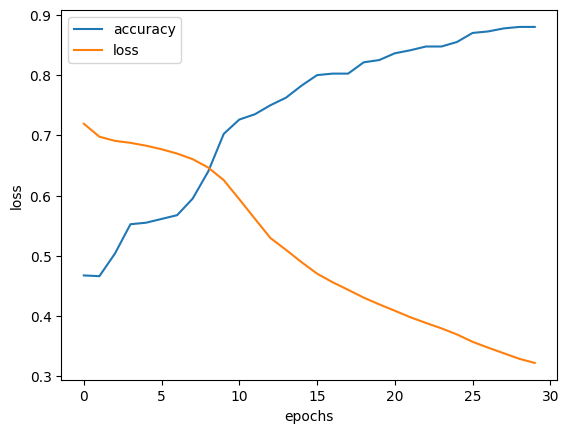

In [36]:
pd.DataFrame(history_5.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
pd.DataFrame(history_5.history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification


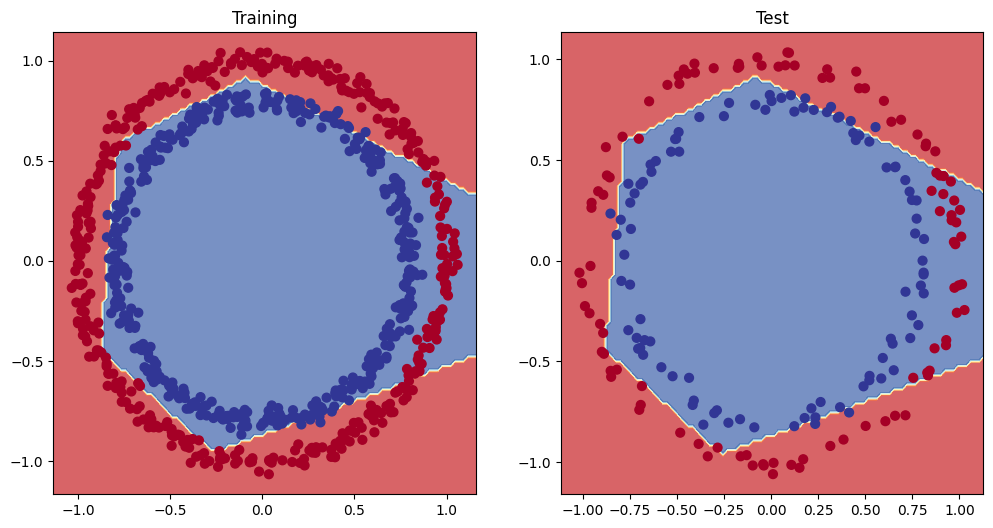

In [37]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training")
plot_decision_boundary(model_5,x_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_5,x_test,y_test)

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:

* A learning rate callback - you can think of a **callback** as an extra piece of funtionality, you can add to your while its training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.



In [38]:
# 1.
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2.
model_6.compile(
    loss="binary_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)
# create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
# 3.
history_6 = model_6.fit(x_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5391 - loss: 0.6867 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5404 - loss: 0.6864 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5434 - loss: 0.6862 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5443 - loss: 0.6859 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5484 - loss: 0.6856 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5491 - loss: 0.6853 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5505 - loss: 0.6849 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5494 - loss: 0.6846 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5568 - loss: 0.6842 - learning_

In [39]:
 model_6.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.4526 - loss: 1.4050


[1.3268513679504395, 0.48500001430511475]

Text(0.5, 0, 'epochs')

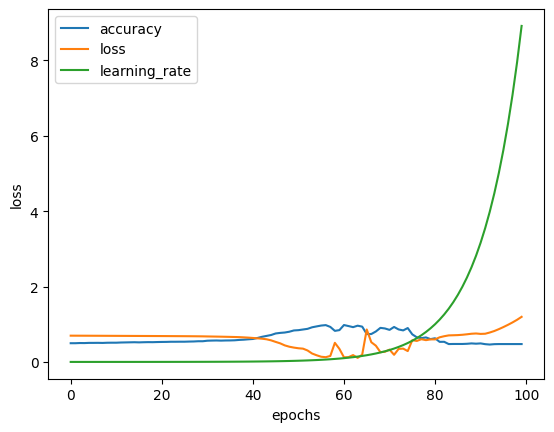

In [40]:
pd.DataFrame(history_6.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
#pd.DataFrame(history_6.history)

Text(0.5, 1.0, 'Learning Rate vs Loss')

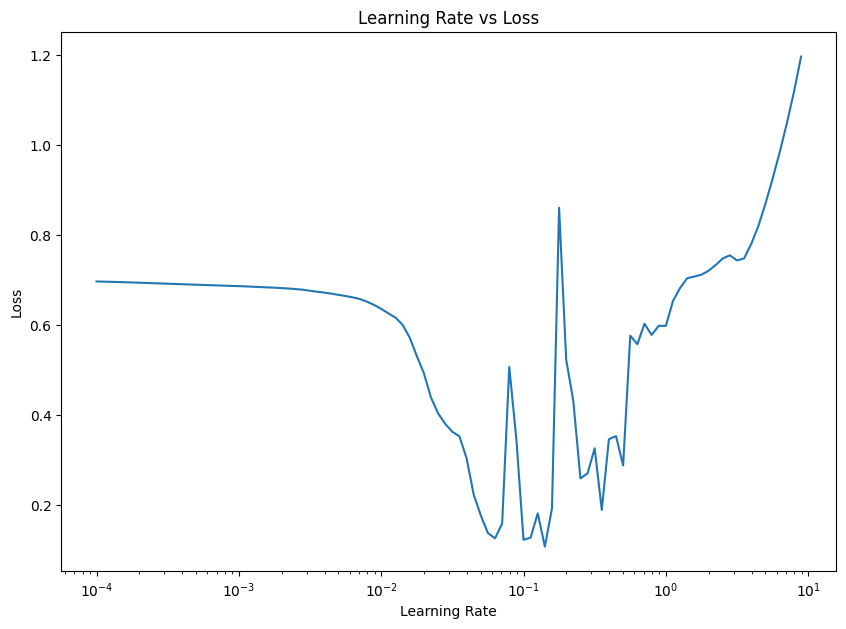

In [41]:
lrs = 1e-4*(10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_6.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

In [42]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [43]:
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_7.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=["accuracy"]
)
model_7.fit(x_train,y_train,epochs=20)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4597 - loss: 0.7206
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5829 - loss: 0.6857 
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5897 - loss: 0.6754 
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6840 - loss: 0.6568 
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7160 - loss: 0.6238 
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7361 - loss: 0.5807 
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7421 - loss: 0.5392 
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7616 - loss: 0.5049 
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7895 - loss: 0.4775 
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8242 - loss: 0.4452 
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8565 - loss: 0.3967 
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0

In [44]:
model_5.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8061 - loss: 0.3965 


[0.401557058095932, 0.8050000071525574]

In [45]:
model_7.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9784 - loss: 0.0812


[0.06597772985696793, 0.9900000095367432]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


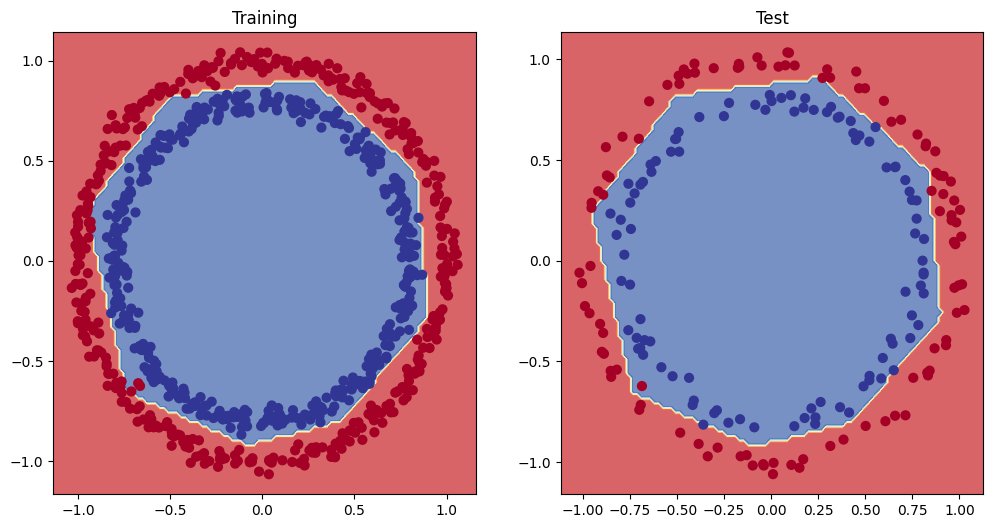

In [46]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training")
plot_decision_boundary(model_7,x_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_7,x_test,y_test)

## Classification evaluation methods


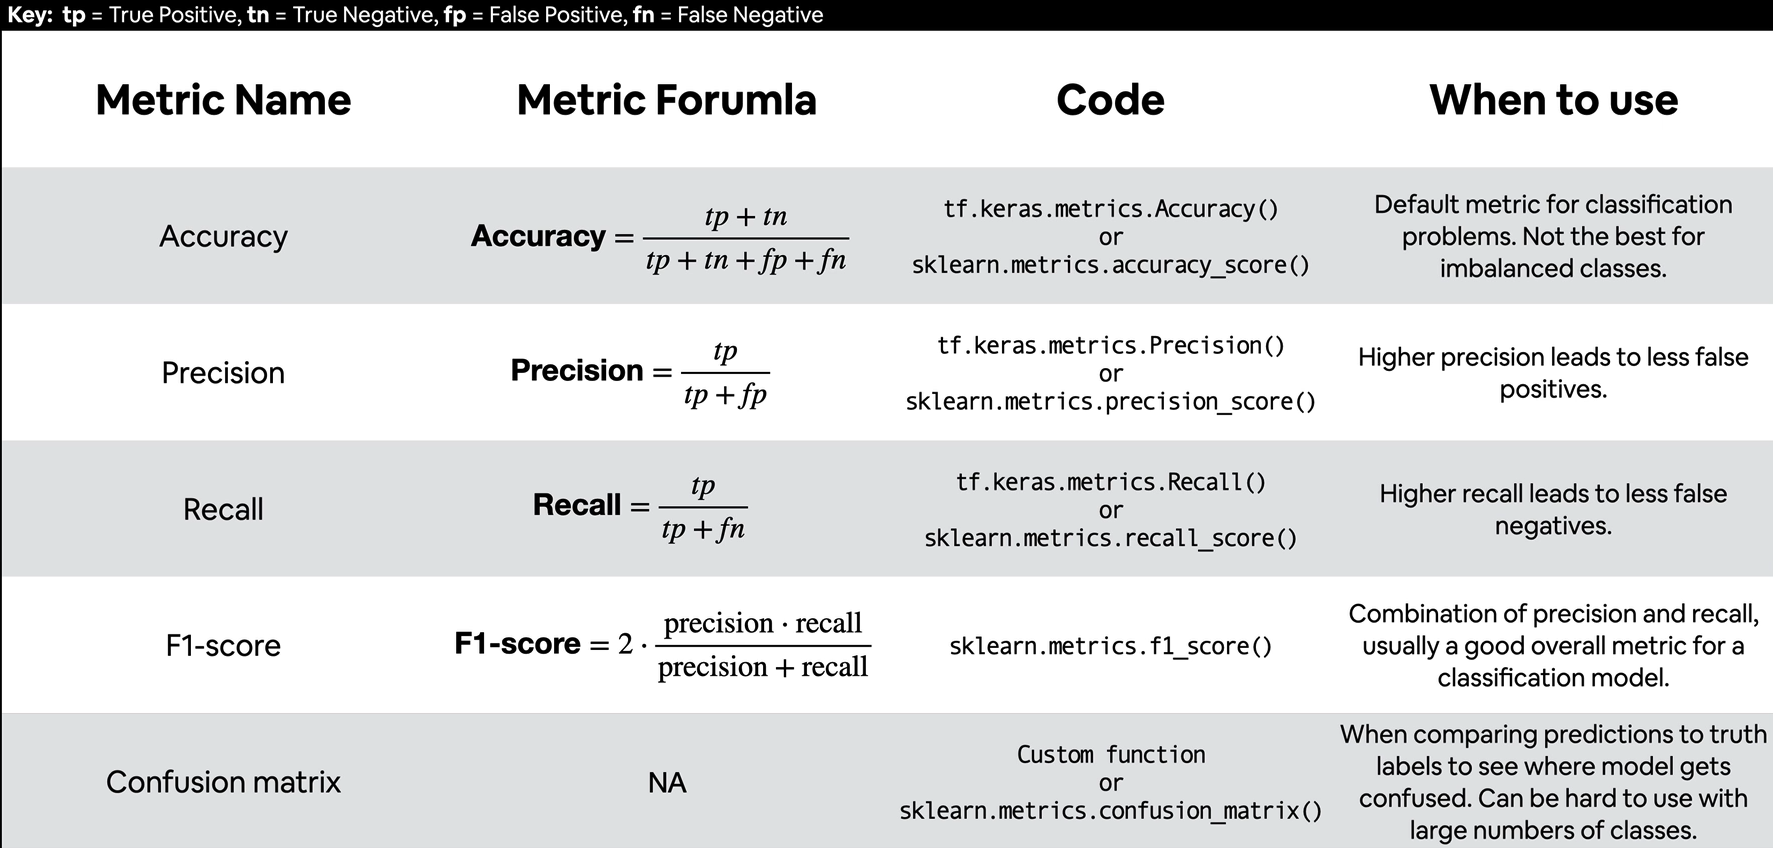

In [47]:
 loss, accuracy = model_7.evaluate(x_test,y_test)
 print(f"Model loss on the test set: {loss}")
 print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9784 - loss: 0.0812 
Model loss on the test set: 0.06597772985696793
Model accuracy on the test set: 99.00%


## Confusion matrix

In [48]:
y_pred = model_7.predict(x_test)
tf.round(y_pred)[:10]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)>

In [49]:
sm.confusion_matrix(y_test,tf.round(y_pred))

array([[102,   1],
       [  1,  96]])

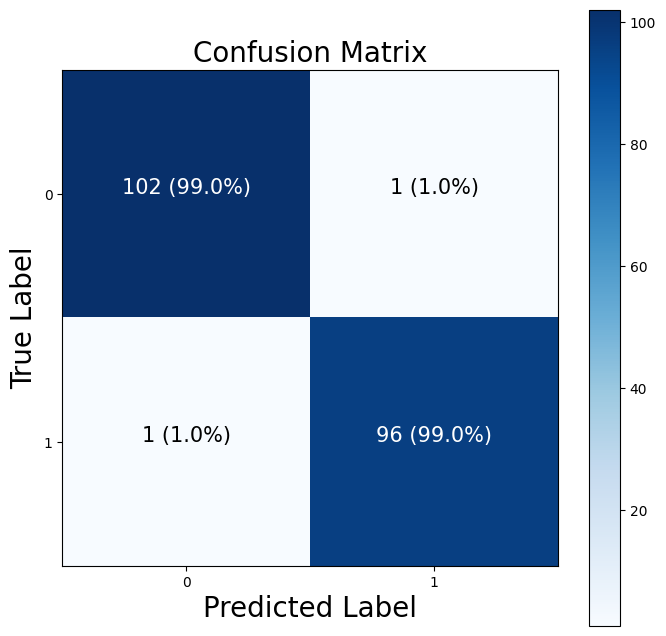

In [50]:
cm = sm.confusion_matrix(y_test, tf.round(y_pred))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  # normalize the cm
n_classes = cm.shape[0]

figsize = (8, 8)
fig = plt.figure(figsize=figsize)  # Create the figure with figsize
ax = fig.add_subplot(111)  # Add a single subplot (111) to the figure

cax = ax.matshow(cm, cmap=plt.cm.Blues)  # Changed cmap to Blues for better contrast
fig.colorbar(cax)

# create classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

# Set labels and titles with improved readability
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()  # Changed to tick_bottom for better visibility

# adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",  # Changed to .1f for 1 decimal place
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=15)  # Added size for better visibility

plt.show()  # Display the plot

# Working with larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**.

* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.


---


To practice mutli-class classificaiton, we're going to build a neural network to classify images of different items of clothing.


---



In [51]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import pandas as pd
import random

(train_data, train_labels), (test_data,test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [52]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
pd.DataFrame(class_names, columns=['Class Names'])

,Class Names
0,T-shirt/top
1,Trouser
2,Pullover
3,Dress
4,Coat
5,Sandal
6,Shirt
7,Sneaker
8,Bag
9,Ankle boot


In [53]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [54]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

In [55]:
def showModelImg(index,multi):
    """
    multi = 1 ==> random 4 images
    multi = 0 ==> single image
    """
    if(multi == 1):
        plt.figure(figsize=(6,6))
        for i in range(4):
            ax = plt.subplot(2,2,i+1)
            random_index = random.randint(0, len(train_data))
            showModelImg(random_index,0)
    else:
        plt.imshow(train_data[index], cmap=plt.cm.binary)
        plt.title(class_names[train_labels[index]])
        plt.axis("off")

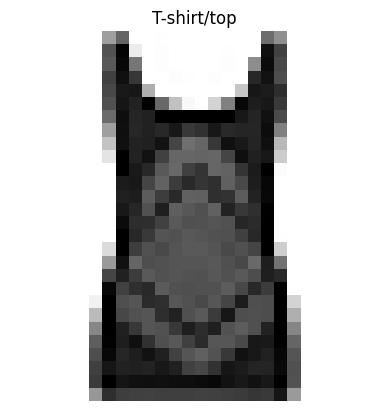

In [56]:
 showModelImg(64,0)

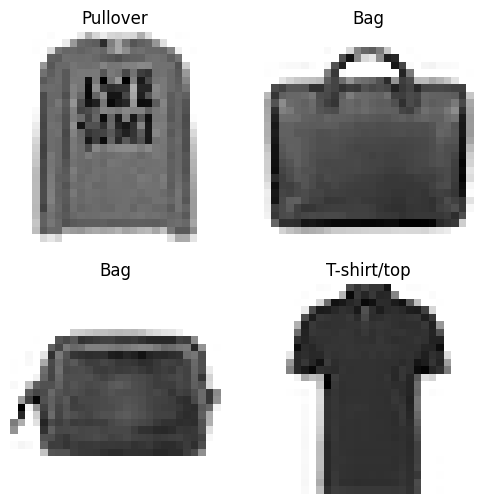

In [57]:
showModelImg(0,1)

## Building multi_class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:

* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = `tf.keras.losses.CategoricalCrosstentropy()`
    * If your labels are one-hot encoded, use `CategoricalCrossentropy()`
    * If your labels are integer form use `SparseCategoricalCrossentropy()`
* Output layer activation = Softmax (not sigmoid)


In [58]:
# 1.create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax"), #tf.keras.activations.softmax()
])

# 2.compile the model
model_8.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3.fit the model
non_norm_history = model_8.fit(train_data,
                               train_labels,
                               epochs=10,
                               validation_data=(test_data,test_labels))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0969 - loss: 3.3390 - val_accuracy: 0.1000 - val_loss: 2.3048
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.0989 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3046
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0980 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3046
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0980 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3046
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0980 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3046
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0980 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3046
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0980 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3046
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0980 - loss: 2.3028 - 

In [59]:
# check model summary
model_8.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [60]:
train_data.min() , train_data.max()

(0, 255)

### Normalizing our data

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1.


In [61]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0
# check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [62]:
# 1.
model_9 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# 2.
model_9.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3.
norm_history = model_9.fit(train_data_norm,
                           train_labels,
                           epochs=10,
                           validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2935 - loss: 1.8711 - val_accuracy: 0.5143 - val_loss: 1.2334
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5244 - loss: 1.1901 - val_accuracy: 0.5991 - val_loss: 1.0794
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6016 - loss: 1.0472 - val_accuracy: 0.6213 - val_loss: 0.9958
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6399 - loss: 0.9646 - val_accuracy: 0.6934 - val_loss: 0.8961
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7049 - loss: 0.8505 - val_accuracy: 0.7152 - val_loss: 0.8072
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7222 - loss: 0.7835 - val_accuracy: 0.7220 - val_loss: 0.7751
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7300 - loss: 0.7547 - val_accuracy: 0.7241 - val_loss: 0.7567
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7342 - loss: 0.7368 - 

> 🔑 **Note**: Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1).

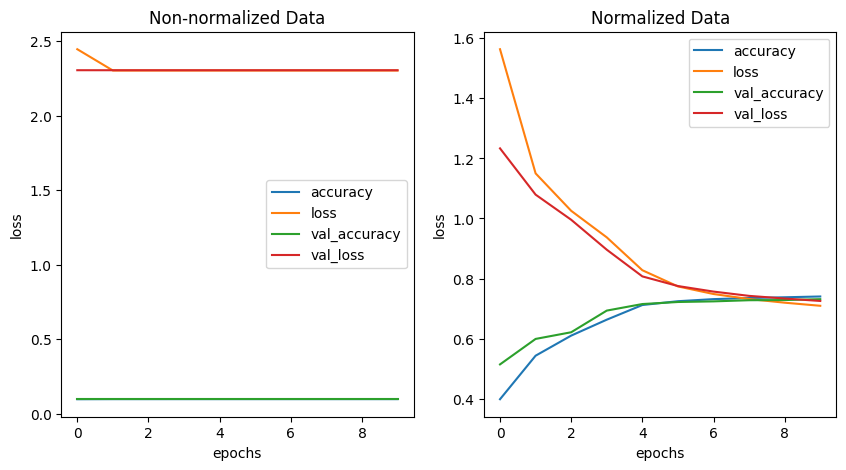

In [63]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot non-normalized data on the first subplot
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data", ax=axes[0])
axes[0].set_ylabel("loss")
axes[0].set_xlabel("epochs")


# Plot normalized data on the second subplot
pd.DataFrame(norm_history.history).plot(title="Normalized Data", ax=axes[1])
axes[1].set_ylabel("loss")
axes[1].set_xlabel("epochs")

# Display the plot
plt.show()

> 🔑 **Note**: The same model with even *slightly* different data can produce *dramatically* different reuslts. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

## Finding the ideal learning rate

In [64]:
 # 1.
 model_10 = tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape=(28,28)),
     tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(10,activation="softmax"),
 ])

 # 2.
model_10.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
 #
 lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

 # 3.
 find_lr_history = model_10.fit(train_data_norm,
              train_labels,
              epochs=10,#40
              validation_data=(test_data_norm,test_labels),
              callbacks=[lr_scheduler])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3832 - loss: 1.6268 - val_accuracy: 0.6079 - val_loss: 0.9938 - learning_rate: 0.0010
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6786 - loss: 0.8578 - val_accuracy: 0.7248 - val_loss: 0.6981 - learning_rate: 0.0011
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7349 - loss: 0.6620 - val_accuracy: 0.7313 - val_loss: 0.6592 - learning_rate: 0.0013
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7404 - loss: 0.6307 - val_accuracy: 0.7353 - val_loss: 0.6435 - learning_rate: 0.0014
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7442 - loss: 0.6164 - val_accuracy: 0.7367 - val_loss: 0.6350 - learning_rate: 0.0016
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7482 - loss: 0.6075 - val_accuracy: 0.7386 - val_loss: 0.6298 - learning_rate: 0.0018
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7503 - l

Text(0.5, 1.0, 'Finding the ideal learning rate on training set')

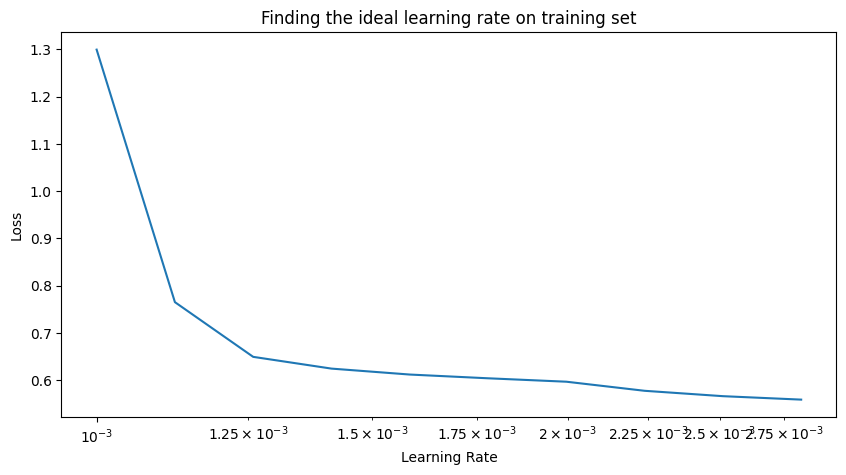

In [65]:
lrs = 1e-3 * (10 ** (np.arange(10) / 20)) #10 -- 40
plt.figure(figsize=(10,5))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate on training set")

In [66]:
10**-3

0.001

In [67]:
# Let's refit a model with the ideal learning rate

# 1.
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# 2.
model_11.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# 3.
ideal_lr_history = model_11.fit(train_data_norm,
                                train_labels,
                                epochs=20,
                                validation_data=(test_data_norm,test_labels))


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3244 - loss: 1.7718 - val_accuracy: 0.5750 - val_loss: 0.9927
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5995 - loss: 0.9281 - val_accuracy: 0.6702 - val_loss: 0.7918
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7277 - loss: 0.7121 - val_accuracy: 0.7565 - val_loss: 0.6549
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7689 - loss: 0.6239 - val_accuracy: 0.7645 - val_loss: 0.6294
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7755 - loss: 0.6002 - val_accuracy: 0.7714 - val_loss: 0.6164
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7802 - loss: 0.5859 - val_accuracy: 0.7752 - val_loss: 0.6066
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7829 - loss: 0.5761 - val_accuracy: 0.7781 - val_loss: 0.6006
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7859 - loss: 0.5687 - 

## Evaluating the multi-class classification model

To evlauate our multi-class classification model we could:

* Evalaute its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecutre)
* Save and export it for use in an application

Let's go through the top 2...


In [68]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(15, 15), text_size=10):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [69]:
y_probs = model_11.predict(test_data_norm) # probs is short for "prediction probabilities"
class_names[tf.argmax(y_probs[0]).numpy()]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


'Ankle boot'

> 🔑 **Note**: Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to make predictions on normalized data).

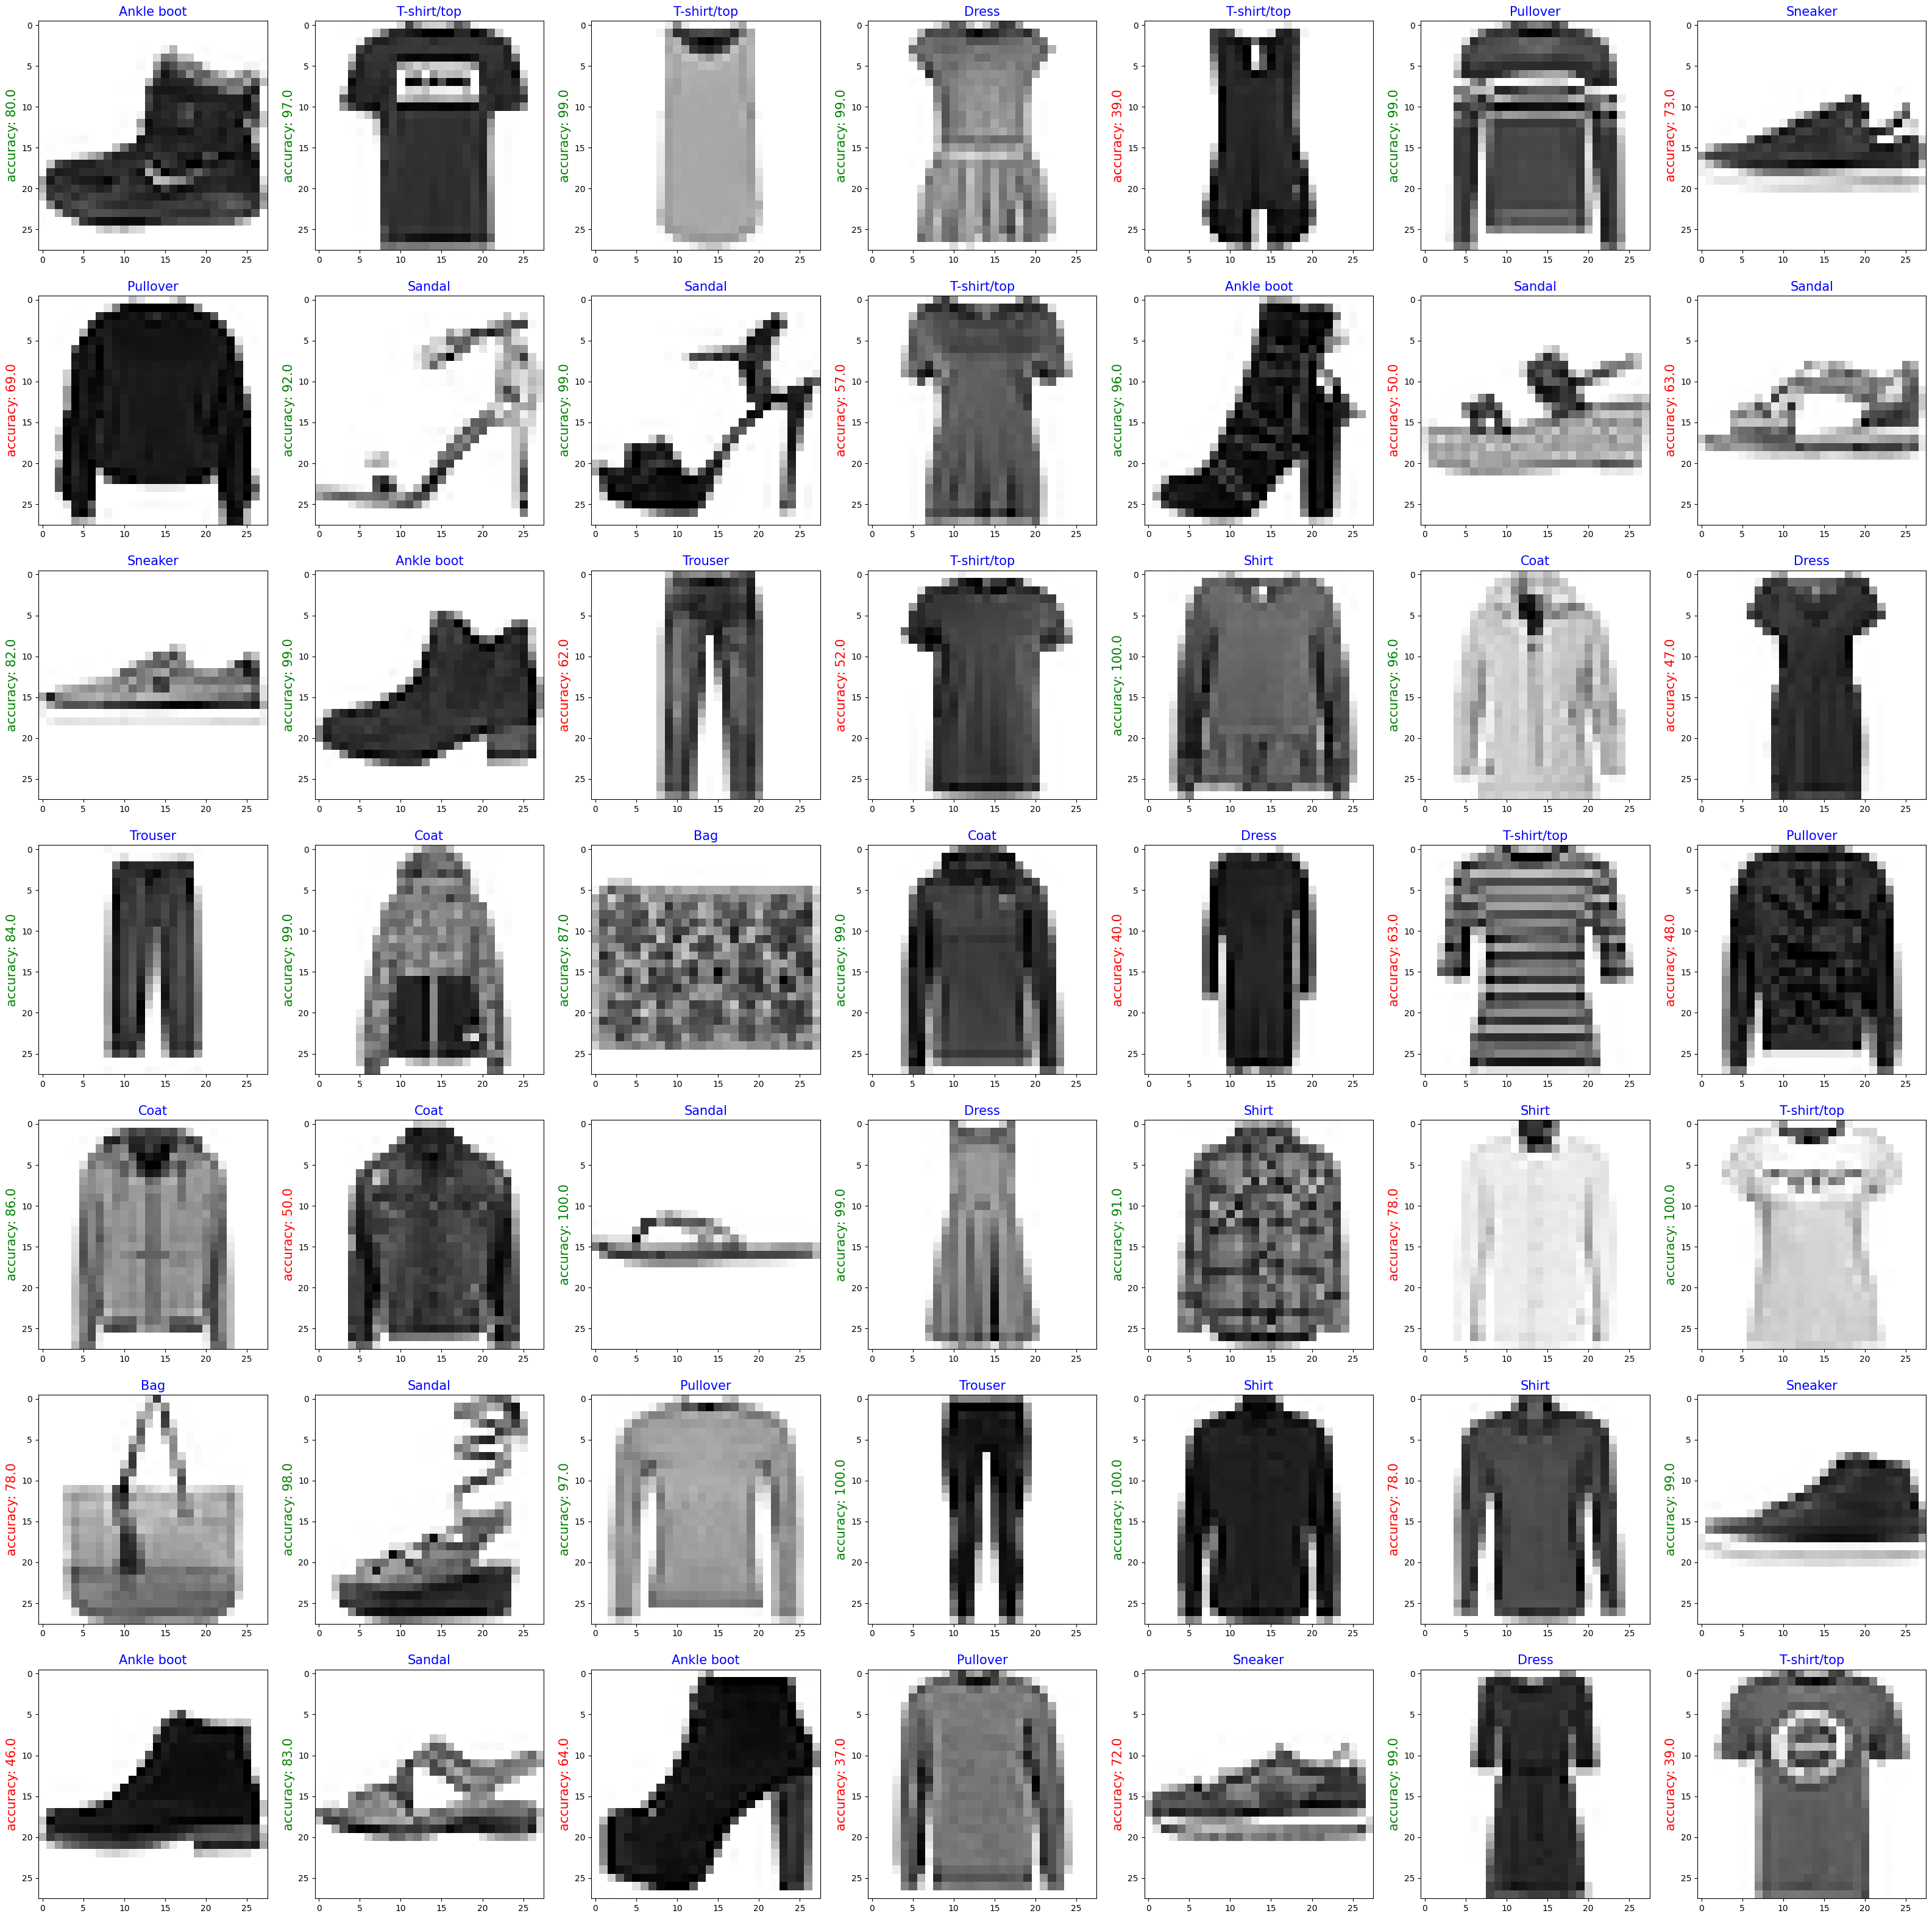

In [70]:
y_pred = np.zeros(len(y_probs))
accuracy = np.zeros(len(y_probs))

for i in range(len(y_probs)):
    y_pred[i-1] =  tf.argmax(y_probs[i-1]).numpy()
    accuracy[i-1] = tf.round(tf.reduce_max(y_probs[i-1])*100)

plt.figure(figsize=(40,40))
index = int(len(y_probs)/200)+1
dem = int(index**0.5)
for i in range(1,index-1):
    plt.subplot(dem,dem,i)
    plt.imshow(train_data[i-1], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[i-1]],color = 'blue',fontsize=15)
    plt.grid(False)
    if(accuracy[i-1] >= 80):
        plt.ylabel(f"accuracy: {accuracy[i-1]}",color='green', fontsize=15)
    else:
        plt.ylabel(f"accuracy: {accuracy[i-1]}",color='red', fontsize=15)

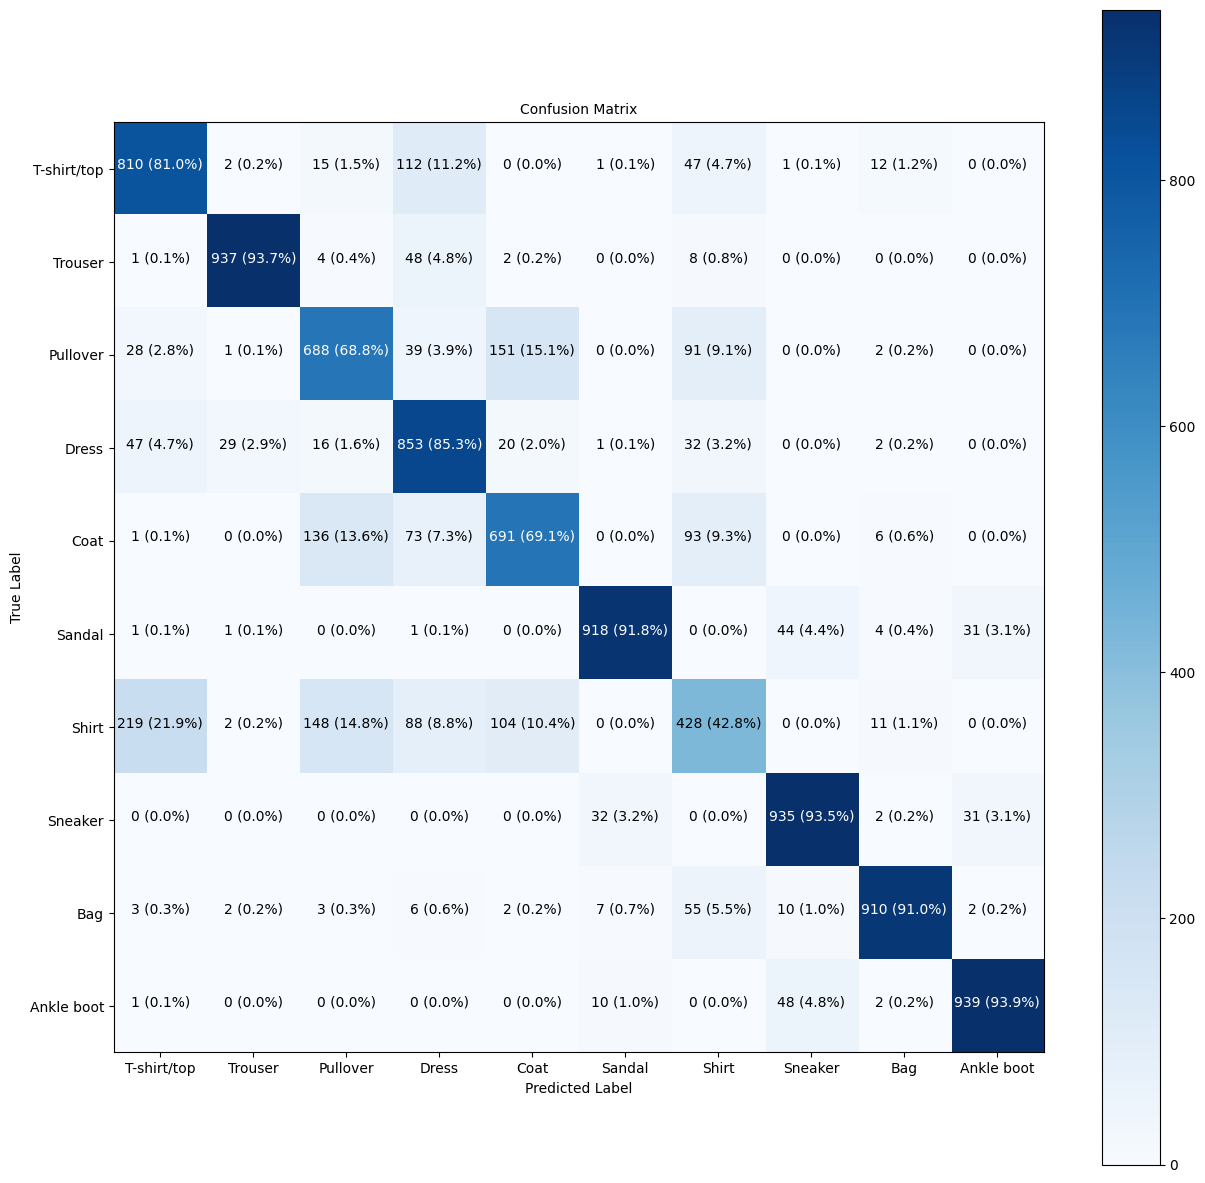

In [71]:
make_confusion_matrix(test_labels, tf.argmax(y_probs, axis=1), classes=class_names)

In [72]:
def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red based on if prediction is right or wrong

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


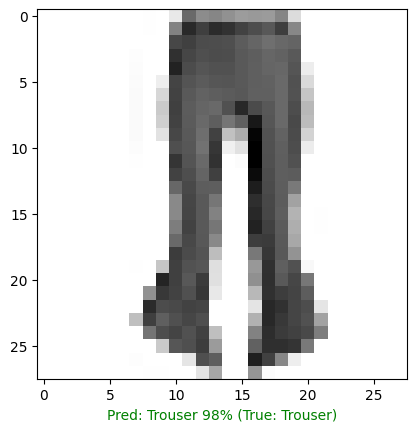

In [73]:
plot_random_image(model=model_11,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

##What patterns is our model learning?

In [74]:
# Find the layers of our most recent model
model_11.layers

[<Flatten name=flatten_3, built=True>,
 <Dense name=dense_27, built=True>,
 <Dense name=dense_28, built=True>,
 <Dense name=dense_29, built=True>]

In [75]:
# Extract a particular layer
model_11.layers[1]

<Dense name=dense_27, built=True>

In [76]:
# Get the patterns of a layer in our network
weights, biases = model_11.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.00942652,  0.07365099,  0.20710768, -0.73836774],
        [-0.1791457 , -0.536878  , -0.05285173,  0.09600262],
        [-0.2066823 ,  0.13516918, -0.91353065, -0.51687396],
        ...,
        [ 0.71006376,  0.0602669 ,  0.01458447, -0.25001487],
        [ 0.30161533, -0.04533152,  0.43829656, -0.6342017 ],
        [-0.05251986,  0.08778503,  0.3017543 , -0.4626861 ]],
       dtype=float32),
 (784, 4))

In [77]:
# Bias and biases shapes
biases, biases.shape

(array([2.021118 , 2.252982 , 1.3933976, 1.4162396], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get intitalized as zeros (at least in the case of a TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.


In [78]:
model_11.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

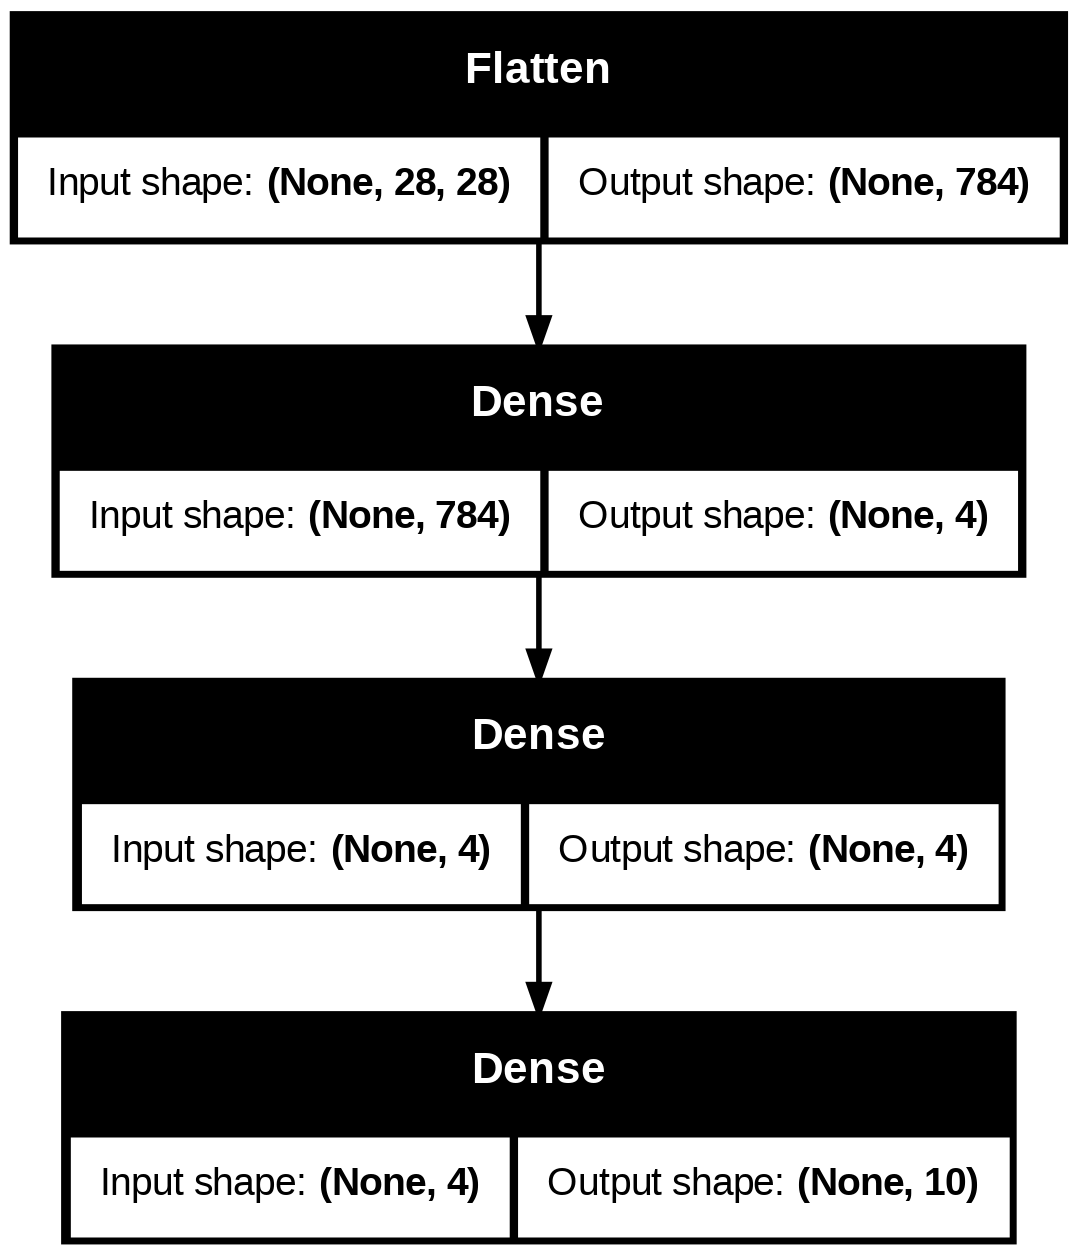

In [79]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_11, show_shapes=True)

# Exercises

In [80]:
from sklearn.datasets import make_moons

In [81]:
x , y = make_moons(n_samples=400,shuffle=True,noise=0.15,random_state=64)
x.shape, len(x),y.shape, len(y)

((400, 2), 400, (400,), 400)

In [82]:
pd.DataFrame({"x1":x[:,0],"x2":x[:,1],"y":y}).head()

,x1,x2,y
0,1.674896,-0.106589,1
1,0.827118,0.580728,0
2,-0.004811,1.117842,0
3,1.745732,0.409757,1
4,0.744934,0.972451,0


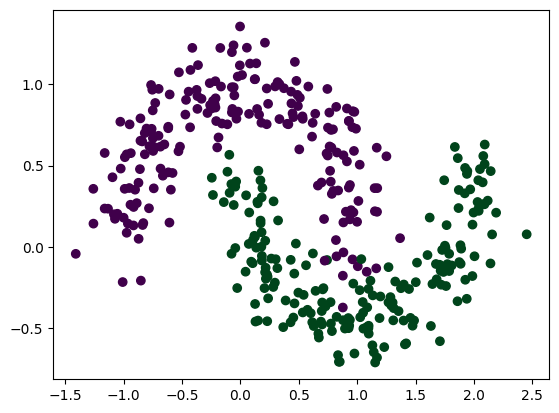

In [83]:
# visualize with a plot
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.PRGn)

In [84]:
x_train = x[:300]
y_train = y[:300]
x_validation = x[300:380]
y_validation = y[300:380]
x_test = x[380:]
y_test = y[380:]

In [85]:
# 1.
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(2,)),
    tf.keras.layers.Dense(15,activation="relu"),
    tf.keras.layers.Dense(15,activation="relu"),
    tf.keras.layers.Dense(15,activation="relu"),
    tf.keras.layers.Dense(15,activation="relu"),
    tf.keras.layers.Dense(15,activation="relu"),
    tf.keras.layers.Dense(15,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])

# 2.
model_12.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# 3.
history = model_12.fit(x_train,y_train,validation_data=(x_validation,y_validation),callbacks=[early_stopping],epochs=120)

Epoch 1/120


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - accuracy: 0.6003 - loss: 0.6921 - val_accuracy: 0.6500 - val_loss: 0.6886
Epoch 2/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6932 - loss: 0.6867 - val_accuracy: 0.7125 - val_loss: 0.6834
Epoch 3/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7393 - loss: 0.6794 - val_accuracy: 0.7375 - val_loss: 0.6757
Epoch 4/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7806 - loss: 0.6675 - val_accuracy: 0.7750 - val_loss: 0.6621
Epoch 5/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8320 - loss: 0.6478 - val_accuracy: 0.7750 - val_loss: 0.6413
Epoch 6/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8462 - loss: 0.6176 - val_accuracy: 0.7750 - val_loss: 0.6109
Epoch 7/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8632 - loss: 0.5748 - val_accuracy: 0.7875 - val_loss: 0.5731
Epoch 8/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8670 - loss: 0.5242 - val_accuracy: 0.8000 - val_loss: 

In [86]:
loss , accuracy = model_12.evaluate(x_test,y_test)
accuracy *= 100

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - accuracy: 1.0000 - loss: 0.0057


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


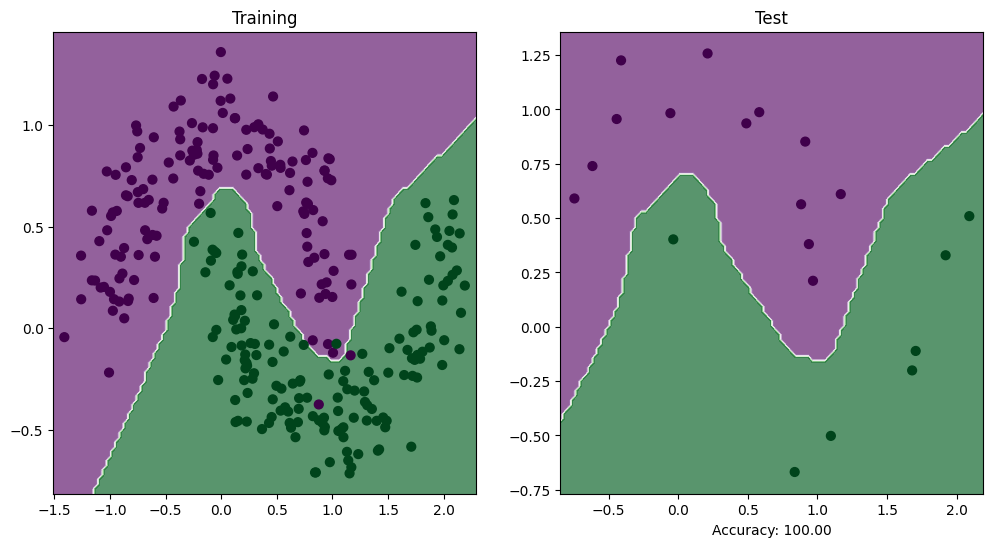

In [87]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training")
plot_decision_boundary(model_12,x_train,y_train,col=plt.cm.PRGn)
plt.subplot(1,2,2)
plt.title("Test")
plt.xlabel(f"Accuracy: {accuracy:0.2f}")
plot_decision_boundary(model_12,x_test,y_test,col=plt.cm.PRGn)

In [88]:
model_12.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 15)                  │              45 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,785 (14.79 KB)

 Trainable params: 1,261 (4.93 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,524 (9.86 KB)

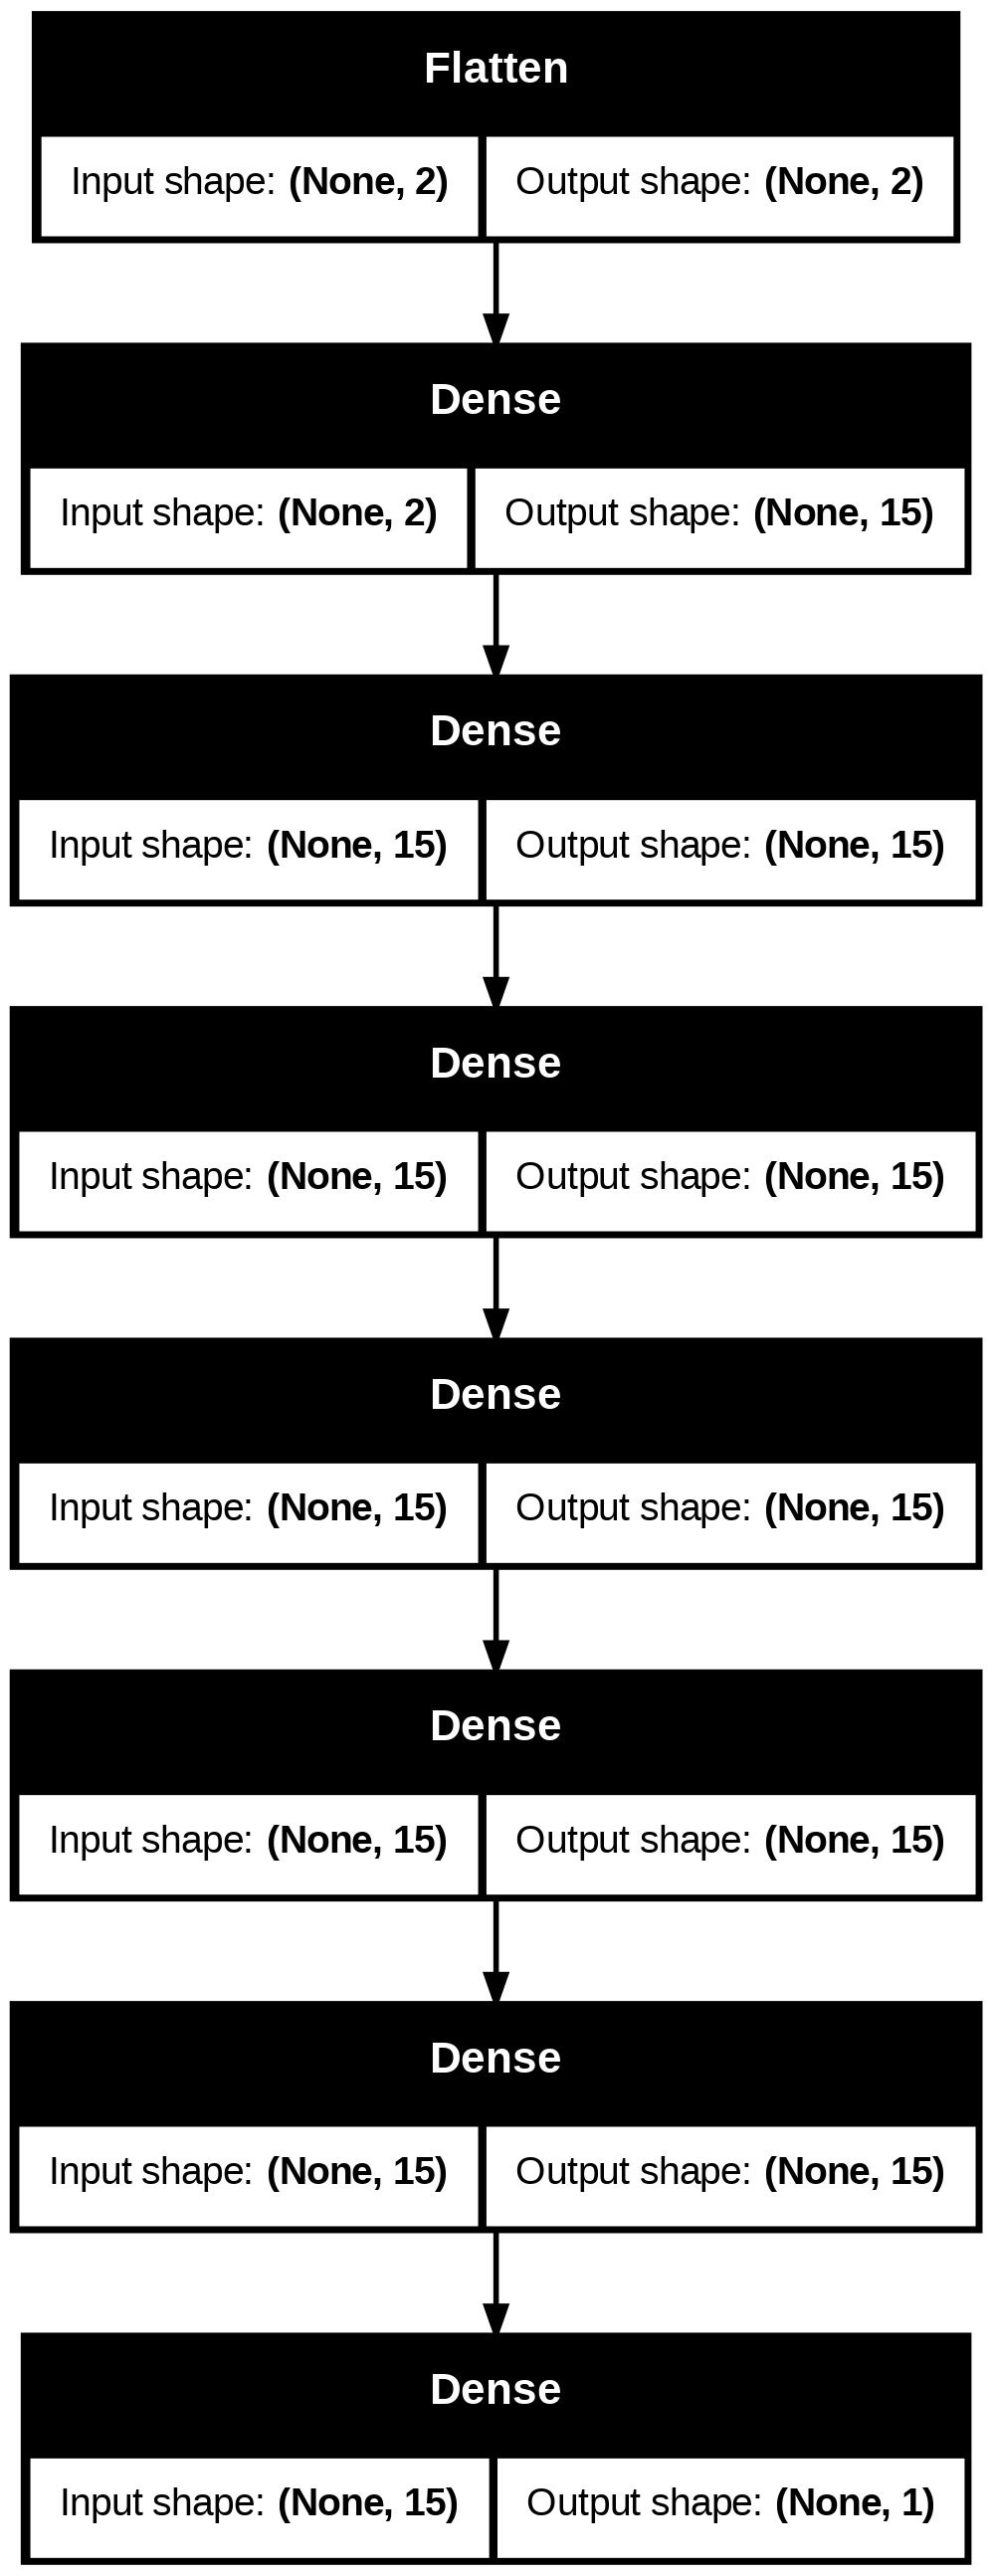

In [89]:
plot_model(model_12, show_shapes=True)